In [ ]:
import pandas as pd
import numpy as np
import itertools
from tabulate import tabulate
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import tree
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.preprocessing import LabelEncoder

In [ ]:
# prompt: loading data using python in colab usinf from google drive
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# reading the training data

In [ ]:
path='/content/drive/MyDrive/Colab Notebooks/ProjectTrainingData.csv'
train_data = pd.read_csv(path)
train_df=train_data.copy()

# reading the test data

In [ ]:

test_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ProjectTestData.csv')
test_df=test_data.copy()


# Transforming the hour in the training data

In [ ]:
import pandas as pd

# Example: If 'date_column' is a datetime column in your dataset
train_df['hour']= pd.to_datetime(train_df['hour'], format='%y%m%d%H')
train_df['hour_of_day'] = train_df['hour'].dt.hour
train_df['day_of_the_week'] = train_df['hour'].dt.day
train_df.drop('hour', axis=1)  # Drop the original datetime column

,id,click,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,...,C14,C15,C16,C17,C18,C19,C20,C21,hour_of_day,day_of_the_week
0,1.000009e+18,0,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,...,15706,320,50,1722,0,35,-1,79,0,21
1,1.000017e+19,0,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,...,15704,320,50,1722,0,35,100084,79,0,21
2,1.000037e+19,0,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,...,15704,320,50,1722,0,35,100084,79,0,21
3,1.000064e+19,0,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,...,15706,320,50,1722,0,35,100084,79,0,21
4,1.000068e+19,0,1005,1,fe8cc448,9166c161,0569f928,ecad2386,7801e8d9,07d7df22,...,18993,320,50,2161,0,35,-1,157,0,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31991085,9.999439e+18,0,1005,0,85f751fd,c4e18dd6,50e219e0,e2fcccd2,5c5a694b,0f2161f8,...,20633,320,50,2374,3,39,-1,23,23,29
31991086,9.999452e+18,0,1005,1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,07d7df22,...,17747,320,50,1974,2,39,-1,33,23,29
31991087,9.999621e+18,0,1005,0,85f751fd,c4e18dd6,50e219e0,92f5800b,ae637522,0f2161f8,...,21191,320,50,2424,1,161,100193,71,23,29
31991088,9.999800e+18,0,1005,1,ce3307ec,7e091613,f028772b,ecad2386,7801e8d9,07d7df22,...,23626,320,50,2707,3,937,100156,61,23,29


# Transforming the hour in the test data

In [ ]:
# Example: If 'date_column' is a datetime column in your dataset
test_df['hour']= pd.to_datetime(test_df['hour'], format='%y%m%d%H')
test_df['hour_of_day'] = test_df['hour'].dt.hour
test_df['day_of_the_week'] = test_df['hour'].dt.day
test_df.drop('hour', axis=1)  # Drop the original datetime column

,id,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,...,C14,C15,C16,C17,C18,C19,C20,C21,hour_of_day,day_of_the_week
0,3295858251275419735,1005,1,85f751fd,c4e18dd6,50e219e0,1dc72b4d,2347f47a,0f2161f8,cd915ca3,...,8334,300,50,761,3,175,100075,23,9,28
1,12281702837842634283,1007,0,85f751fd,c4e18dd6,50e219e0,8311368f,1dc9b529,0f2161f8,ec0aff16,...,24303,320,50,2788,3,295,100194,240,20,31
2,4638380339534007785,1005,0,4e7614cf,c1aa3c04,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,...,24165,320,50,2776,0,35,-1,79,9,31
3,17039804736879076347,1002,0,48c42b43,de0f0f82,50e219e0,ecad2386,7801e8d9,07d7df22,dfb9b781,...,23438,320,50,2684,2,1327,-1,52,1,31
4,5753064066292192109,1005,1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,...,24084,320,50,2761,2,35,100148,13,19,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13015336,13925888664291307582,1005,0,28616ed9,3bcb0c02,f66779e6,ecad2386,7801e8d9,07d7df22,a99f214a,...,23866,320,50,2736,3,33,100170,246,10,30
13015337,16609686573956964319,1005,1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,...,23725,320,50,2716,3,47,-1,23,8,30
13015338,4549134116722204000,1005,0,17d1b03f,f3845767,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,...,22104,320,50,2545,0,431,-1,221,23,31
13015339,2114008866308662546,1005,0,85f751fd,c4e18dd6,50e219e0,ce183bbd,ae637522,cef3e649,a99f214a,...,24132,320,50,2768,1,167,100192,71,9,31


In [ ]:
# path='/content/drive/MyDrive/Colab Notebooks/ProjectTrainingData.csv'
# train_data = pd.read_csv(path)
# train_df=train_data.copy()

# label encode train and test data

In [ ]:
def label_encoding(train_df, test_df):

    cat_cols = train_df.select_dtypes(include='object').columns

    train_encoded = train_df.copy()
    test_encoded = test_df.copy()

    for col in cat_cols:
        le = LabelEncoder()

        # Corrected concatenation for fitting the encoder
        # It concatenates the values of the column from both dataframes
        le.fit(pd.concat([train_df[col], test_df[col]], ignore_index=True))

        # Transform the training and test data with the fitted encoder
        train_encoded[col] = le.transform(train_df[col])
        test_encoded[col] = le.transform(test_df[col])

    return train_encoded, test_encoded

In [ ]:
train_encoded, test_encoded = label_encoding(train_df, test_df)

# downloading the encoded train and test data

In [ ]:
# Specify your path (e.g., "drive/My Drive/your_folder/")
path = '/content/drive/MyDrive/Colab Notebooks/test_encoded_data.csv'
test_encoded.to_csv(path, index=False)


In [ ]:
path2= '/content/drive/MyDrive/Colab Notebooks/train_encoded_data.csv'
train_encoded.to_csv(path2, index=False)


In [ ]:
path='/content/drive/MyDrive/Colab Notebooks/train_encoded_data.csv'
train_data = pd.read_csv(path)
train_encoded=train_data.copy()


In [ ]:
train_encoded.head()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,C14,C15,C16,C17,C18,C19,C20,C21,hour_of_day,day_of_the_week
0,1.000009e+18,0,2014-10-21,1005,0,594,7495,2,8433,265,...,15706,320,50,1722,0,35,-1,79,0,21
1,1.000017e+19,0,2014-10-21,1005,0,594,7495,2,8433,265,...,15704,320,50,1722,0,35,100084,79,0,21
2,1.000037e+19,0,2014-10-21,1005,0,594,7495,2,8433,265,...,15704,320,50,1722,0,35,100084,79,0,21
3,1.000064e+19,0,2014-10-21,1005,0,594,7495,2,8433,265,...,15706,320,50,1722,0,35,100084,79,0,21
4,1.000068e+19,0,2014-10-21,1005,1,4800,4548,0,8433,265,...,18993,320,50,2161,0,35,-1,157,0,21


<ipython-input-14-4b88a3d9365c>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = train_encoded.corr()


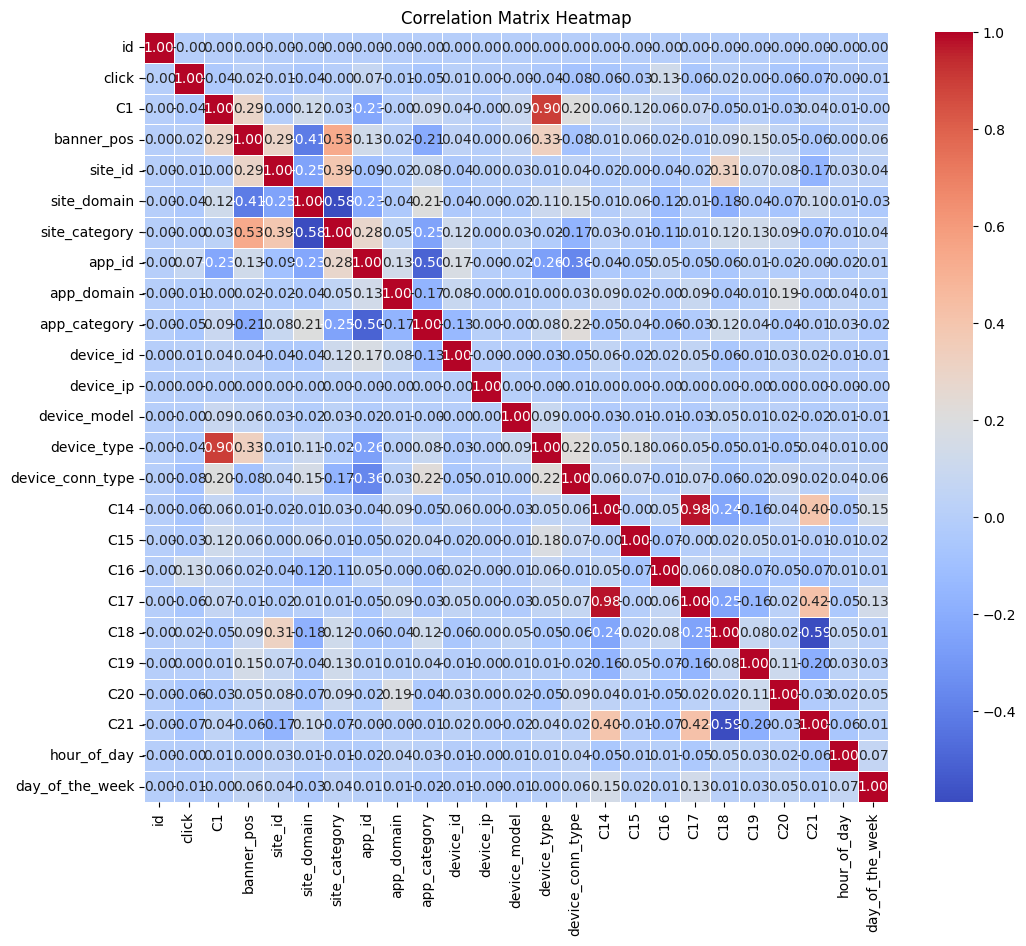

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
corr_matrix = train_encoded.corr()
plt.figure(figsize=(12, 10))  # You can adjust the size of the figure
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


In [ ]:
def sample_train(train_df):
  class_1 = train_df[train_df['click'] == 1]
  class_0 = train_df[train_df['click'] == 0]
  class_0_sampled = class_0.sample(n=6000000, random_state=42)
  X_balanced = pd.concat([class_1, class_0_sampled])
  X_balanced = X_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

  X= X_balanced[['click','hour_of_day','day_of_the_week','device_ip', 'device_model', 'C14', 'device_id', 'site_id', 'C20',
       'site_domain', 'C19', 'C21', 'app_id']]
  Y = X['click']
  X = X.drop('click', axis=1)

  return X, Y


In [ ]:
X, Y = sample_train(train_encoded)

In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/balanced_X_data.csv'
X.to_csv(path, index=False)

path2 = '/content/drive/MyDrive/Colab Notebooks/balanced_Y_data.csv'
Y.to_csv(path2, index=False)

In [ ]:
X_test= test_encoded[['id','hour_of_day','day_of_the_week','device_ip', 'device_model', 'C14', 'device_id', 'site_id', 'C20',
       'site_domain', 'C19', 'C21', 'app_id']]

# Splitting the data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

# Logistic regresssion

In [ ]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss, confusion_matrix, classification_report

In [ ]:
def calculate_log_loss(y_true, y_pred):
    eps = 1e-15
    y_pred = np.clip(y_pred, eps, 1 - eps)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

In [ ]:
log_reg = LogisticRegression(
    max_iter=50,
    tol=1e-4,
    solver='saga',
    n_jobs=-1,
    verbose=1
)

# Train the model
log_reg.fit(X_train, Y_train)

# Make predictions (probabilities)



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


max_iter reached after 439 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(max_iter=50, n_jobs=-1, solver='saga', verbose=1)

In [ ]:
from sklearn.metrics import classification_report

y_pred_prob = log_reg.predict_proba(X_test)[:, 1]
y_pred_values= log_reg.predict(X_test)

# Calculate log loss
loss = calculate_log_loss(Y_test, y_pred_prob)

# Generate confusion matrix
conf_matrix = confusion_matrix(Y_test, y_pred_values)

classification_report = classification_report(Y_test, y_pred_values)


# Output results
print(f'Log Loss for Logistic Regression: {loss}')
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_report)

Log Loss for Logistic Regression: 0.6802067430223887
Confusion Matrix:
 [[976624 524070]
 [737442 620609]]
Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.65      0.61   1500694
           1       0.54      0.46      0.50   1358051

    accuracy                           0.56   2858745
   macro avg       0.56      0.55      0.55   2858745
weighted avg       0.56      0.56      0.55   2858745



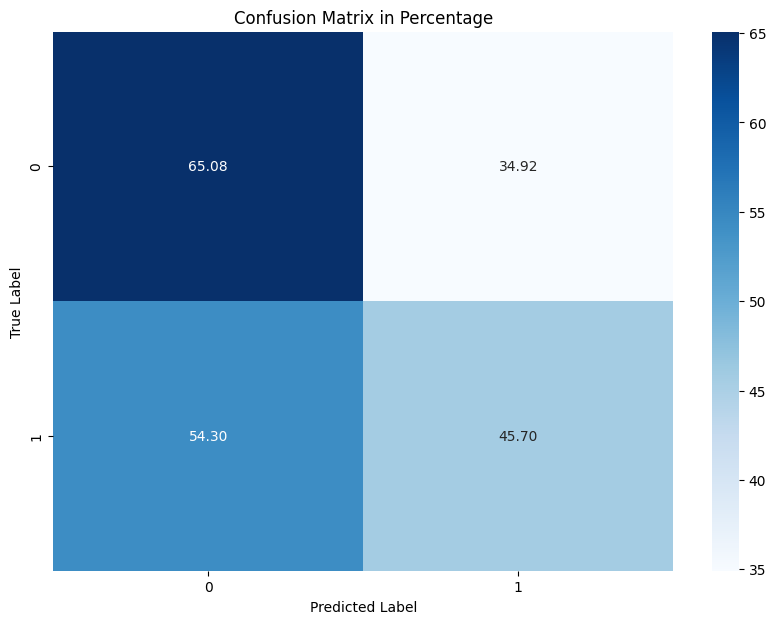

In [ ]:
conf_matrix = confusion_matrix(Y_test, y_pred_values)
conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_normalized * 100, annot=True, fmt='.2f', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix in Percentage')
plt.show()

In [ ]:
import xgboost as xgb
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss

# XGBClassifier MODEL

In [ ]:

# Define your calculate_log_loss function
def calculate_log_loss(y_true, y_pred):
    eps = 1e-15
    y_pred = np.clip(y_pred, eps, 1 - eps)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# Initialize an XGBoost classifier
model = xgb.XGBClassifier(
    n_estimators=100,
    #max_depth=3,
    max_depth=20,
    learning_rate=0.1,
    objective='binary:logistic',
    njobs=-1,
    random_state=42
)

# Fit the model to the training set
model.fit(X_train, Y_train)
# Predict probabilities


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [23:28:19] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "njobs" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=20, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None, njobs=-1,
              num_parallel_tree=None, ...)

In [ ]:
y_pred_prob = model.predict_proba(X_test)[:, 1]  # Assuming a binary classification; adjust if necessary
# Calculate log loss
log_loss = calculate_log_loss(Y_test, y_pred_prob)
conf_matrix_XGB = confusion_matrix(Y_test, y_pred_values)
classification_report_XGB = classification_report(Y_test, y_pred_values)

print(f'Log Loss: {log_loss}')
print("Confusion Matrix:\n", conf_matrix_XGB)
print("Classification Report:\n", classification_report_XGB)

Log Loss: 0.5764424800872803
Confusion Matrix:
 [[1950091 1051108]
 [1474102 1242188]]
Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.65      0.61   3001199
           1       0.54      0.46      0.50   2716290

    accuracy                           0.56   5717489
   macro avg       0.56      0.55      0.55   5717489
weighted avg       0.56      0.56      0.55   5717489



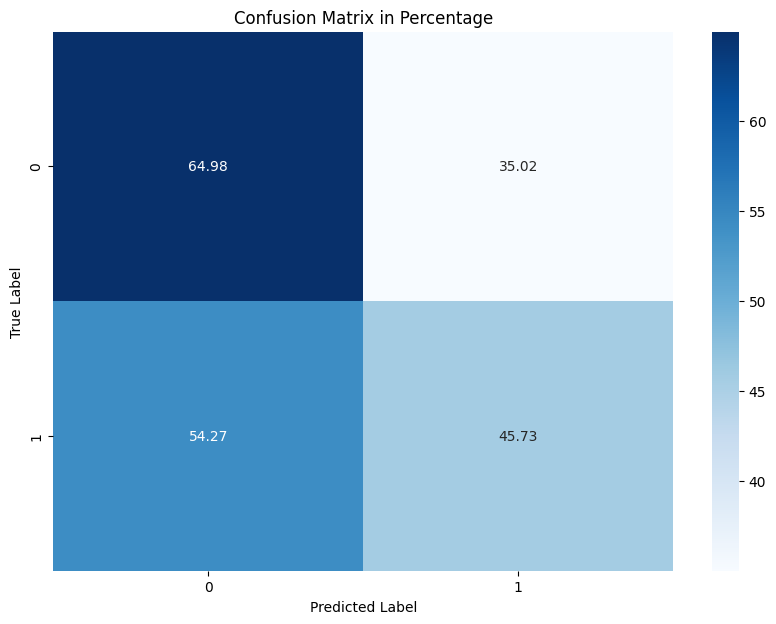

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming y_pred_values are your model predictions and Y_test are the true labels
conf_matrix = confusion_matrix(Y_test, y_pred_values)
conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_normalized * 100, annot=True, fmt='.2f', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix in Percentage')
plt.show()



In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.model_selection import train_test_split
import numpy as np

# NEURAL NETWORK MODEL

In [ ]:


# Assuming X_train, y_train, X_test, y_test are already defined

model = Sequential([
    Dense(128, activation='relu', use_bias=True , input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu', use_bias=True),
    BatchNormalization(),
    Dropout(0.3),
    Dense(1, activation='sigmoid', use_bias=False)  # Use 'softmax' for multi-class classification
])

# Load the best model
#model.load_weights('best_model.h5')

model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Or 'categorical_crossentropy'
              metrics=['accuracy'])

# Define ModelCheckpoint callback
checkpoint = ModelCheckpoint(
    '/content/drive/MyDrive/Colab Notebooks/best_model.h5',
    monitor='val_loss',
    verbose=1,
    save_best_only=True,
    mode='min'
)

# Define EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    verbose=1,
    mode='min',
    restore_best_weights=True
)




Epoch 1/100
5022/5026 [============================>.] - ETA: 0s - loss: 0.6853 - accuracy: 0.5559
Epoch 1: val_loss improved from inf to 0.68071, saving model to /content/drive/MyDrive/Colab Notebooks/best_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


5026/5026 [==============================] - 39s 7ms/step - loss: 0.6853 - accuracy: 0.5559 - val_loss: 0.6807 - val_accuracy: 0.5662
Epoch 2/100
5024/5026 [============================>.] - ETA: 0s - loss: 0.6786 - accuracy: 0.5662
Epoch 2: val_loss did not improve from 0.68071
5026/5026 [==============================] - 39s 8ms/step - loss: 0.6786 - accuracy: 0.5662 - val_loss: 0.6817 - val_accuracy: 0.5654
Epoch 3/100
5025/5026 [============================>.] - ETA: 0s - loss: 0.6764 - accuracy: 0.5699
Epoch 3: val_loss did not improve from 0.68071
5026/5026 [==============================] - 37s 7ms/step - loss: 0.6764 - accuracy: 0.5699 - val_loss: 0.6889 - val_accuracy: 0.5785
Epoch 4/100
5020/5026 [============================>.] - ETA: 0s - loss: 0.6739 - accuracy: 0.5757
Epoch 4: val_loss did not improve from 0.68071
5026/5026 [==============================] - 37s 7ms/step - loss: 0.6739 - accuracy: 0.5757 - val_loss: 0.6867 - val_accuracy: 0.5807
Epoch 5/100
5024/5026 [===

In [ ]:
history = model.fit(
    X_train, Y_train,
    epochs=100,
    batch_size=1024,
    validation_split=0.1,
    callbacks=[checkpoint, early_stopping]
)

y_pred_prob = model.predict(X_test)

log_loss = calculate_log_loss(Y_test, y_pred_prob)
print(f'Custom Log Loss: {log_loss}')

# hyper parameter tuning for XGBoost

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 10, 20],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(
    estimator=xgb.XGBClassifier(objective='binary:logistic', n_jobs=-1, random_state=42),
    param_grid=param_grid,
    scoring='neg_log_loss',  # Use negative log loss as the scoring metric
    cv=5,  # Number of cross-validation folds
    verbose=1
)

# Fit the GridSearchCV to the training data
grid_search.fit(X_train, Y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Use the best estimator to make predictions
y_pred_prob = grid_search.best_estimator_.predict_proba(X_test)[:, 1]
y_pred_values = grid_search.best_estimator_.predict(X_test)

# Calculate log loss, confusion matrix, and classification report
log_loss = calculate_log_loss(Y_test, y_pred_prob)
conf_matrix_XGB = confusion_matrix(Y_test, y_pred_values)
classification_report_XGB = classification_report(Y_test, y_pred_values)

print(f'Log Loss: {log_loss}')
print("Confusion Matrix:\n", conf_matrix_XGB)
print("Classification Report:\n", classification_report_XGB)


# hyper parameter tuning for Logistic regression

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Define the parameter grid
param_grid = {
    'max_iter': [100, 200, 350]  # Specified values for max_iter
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(
    estimator=LogisticRegression(tol=1e-4, solver='saga', n_jobs=-1, verbose=1),
    param_grid=param_grid,
    scoring='neg_log_loss',  # Use negative log loss as the scoring metric
    cv=5,  # Number of cross-validation folds
    verbose=1
)

# Fit the GridSearchCV to the training data
grid_search.fit(X_train, Y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Use the best estimator to make predictions
y_pred_prob = grid_search.best_estimator_.predict_proba(X_test)[:, 1]
y_pred_values = grid_search.best_estimator_.predict(X_test)

# Calculate log loss, confusion matrix, and classification report
log_loss = calculate_log_loss(Y_test, y_pred_prob)
conf_matrix_LR = confusion_matrix(Y_test, y_pred_values)
classification_report_LR = classification_report(Y_test, y_pred_values)

print(f'Log Loss: {log_loss}')
print("Confusion Matrix:\n", conf_matrix_LR)
print("Classification Report:\n", classification_report_LR)
